In [1]:
import os

In [2]:
os.getcwd()
os.chdir("C:\\Users\\infoa\\Desktop\\Data mining 2\\Homework1")

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("Boston.csv")
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
for i in data.columns:
    import matplotlib.pyplot as plt 
    plt.hist(data[i])
    plt.title(i)
    #plt.savefig(i)
    plt.show()
    plt.close()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [36]:
from sklearn.preprocessing import KBinsDiscretizer

In [37]:
enc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data_discrete = data.drop(['chas'], axis = 1)


In [38]:
data_discrete = enc.fit_transform(data_discrete)

In [39]:
data_discrete = pd.DataFrame(data_discrete)
data_discrete.insert(3, "chas", data['chas'], True)


In [40]:
data_discrete.columns = data.columns

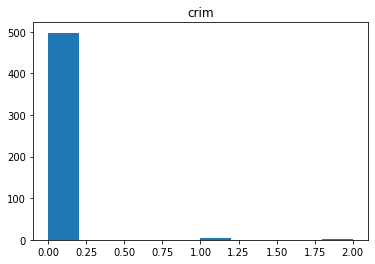

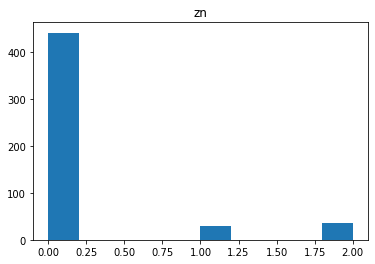

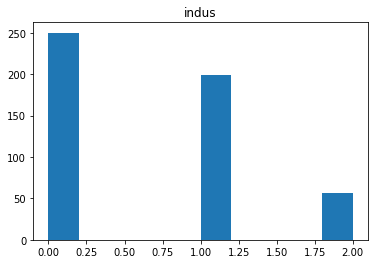

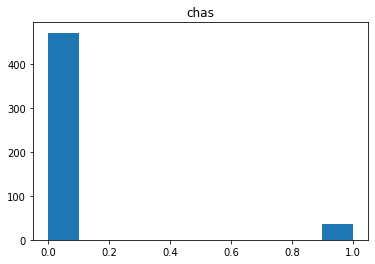

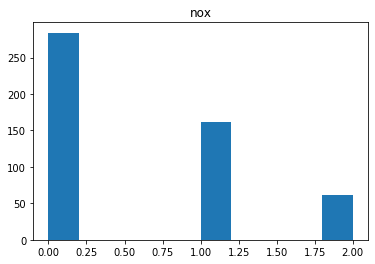

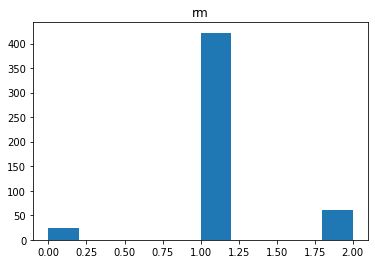

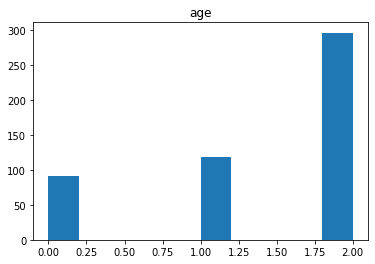

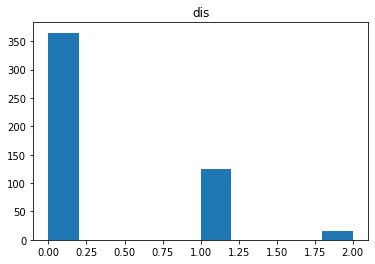

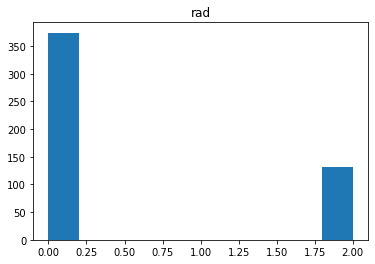

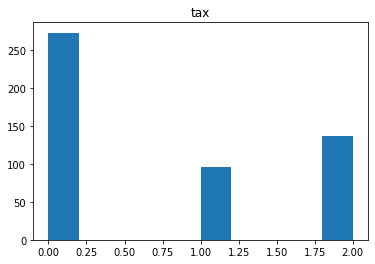

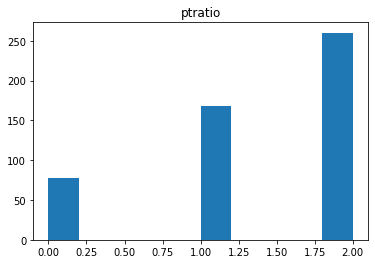

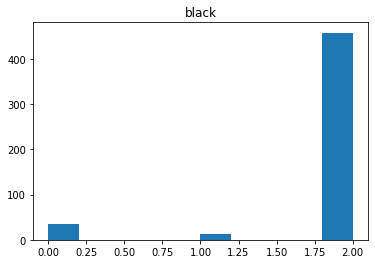

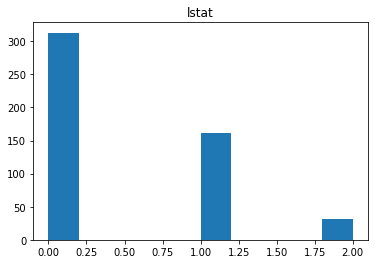

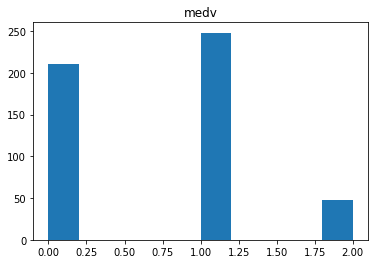

In [42]:
for i in data_discrete.columns:
    import matplotlib.pyplot as plt 
    plt.hist(data_discrete[i])
    plt.title(i)
    #plt.savefig(i)
    plt.show()
    plt.close()


In [43]:

from sklearn.preprocessing import OneHotEncoder 

onehotencoder = OneHotEncoder() 
data_binary = pd.DataFrame()

In [44]:
for column in data_discrete.columns:
    if column == 'rad':
        x = onehotencoder.fit_transform(np.array(data_discrete[column]).reshape(506,1)).toarray()
        data_binary[column + " Low"] = x[:,0]
        data_binary[column + " High"] = x[:,1]
    elif column != 'chas':
        x = onehotencoder.fit_transform(np.array(data_discrete[column]).reshape(506,1)).toarray()
        data_binary[column + " Low"] = x[:,0]
        data_binary[column + " Medium"] = x[:,1]
        data_binary[column + " High"] = x[:,2]
    else:
        data_binary[column] = data_discrete[column]

C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you

In [45]:
data_binary.to_csv("data_binary.csv")

In [46]:
data_binary

,crim Low,crim Medium,crim High,zn Low,zn Medium,zn High,indus Low,indus Medium,indus High,chas,...,ptratio High,black Low,black Medium,black High,lstat Low,lstat Medium,lstat High,medv Low,medv Medium,medv High
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
502,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
503,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
504,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [47]:
data_binary.columns


Index(['crim Low', 'crim Medium', 'crim High', 'zn Low', 'zn Medium',
       'zn High', 'indus Low', 'indus Medium', 'indus High', 'chas', 'nox Low',
       'nox Medium', 'nox High', 'rm Low', 'rm Medium', 'rm High', 'age Low',
       'age Medium', 'age High', 'dis Low', 'dis Medium', 'dis High',
       'rad Low', 'rad High', 'tax Low', 'tax Medium', 'tax High',
       'ptratio Low', 'ptratio Medium', 'ptratio High', 'black Low',
       'black Medium', 'black High', 'lstat Low', 'lstat Medium', 'lstat High',
       'medv Low', 'medv Medium', 'medv High'],
      dtype='object')

In [48]:
data_binary.shape

(506, 39)

In [49]:
import matplotlib.pyplot as plt
barplot = data_binary.sum()
height = list(barplot)[:39]
bar_names = list(range(39))
bars = tuple(bar_names)[:39]
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.title("Item/Feature Frequncy plot")
plt.xlabel("Items/Features")
plt.ylabel("Frequency")
 
# Create names on the x-axis
plt.xticks(y_pos, bars)


# Show graphic
plt.savefig('freqplot')
plt.close()





In [51]:
records = []
for i in  range(506):
    list1 = []
    list2 = data_binary.columns
    for j in range(0,39):
        x = data_binary.values[i,j]
        if x == 1.0:
            list1.append(str(list2[j]))
        
    records.append(list1)
    
    

In [52]:
from apyori import apriori

In [146]:
association_rules = apriori(records, min_support = 0.4, min_confidence = 0.4, min_lift = 1, min_length = 2)
association_results = list(association_rules)
len(association_results)


246

In [147]:
association_results

[RelationRecord(items=frozenset({'age High'}), support=0.5849802371541502, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'age High'}), confidence=0.5849802371541502, lift=1.0)]),
 RelationRecord(items=frozenset({'black High'}), support=0.9051383399209486, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'black High'}), confidence=0.9051383399209486, lift=1.0)]),
 RelationRecord(items=frozenset({'crim Low'}), support=0.9841897233201581, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'crim Low'}), confidence=0.9841897233201581, lift=1.0)]),
 RelationRecord(items=frozenset({'dis Low'}), support=0.7213438735177866, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'dis Low'}), confidence=0.7213438735177866, lift=1.0)]),
 RelationRecord(items=frozenset({'indus Low'}), support=0.49407114624505927, ordered_statistics=[OrderedStatistic(items_base=frozenset(), 

In [148]:
results = []

for item in association_results:
    pairs = item[0]
    items = [x for x in pairs]
    
    value2 = str(item[1])[:7]
    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    
    items.append(value2)
    items.append(value3)
    items.append(value4)
    
    results.append(items)
    

    
#Label = ['Item1','Item2', 'Support', 'Confidence', 'Lift']
    
#housing_suggestions = pd.DataFrame.from_records(results, columns = Label)

max_len = []
for result in results:
    max_len.append(len(result))

max_len = max(max_len)


label = []

for i in range(max_len-3):
    label.append(str('Item')+str(i))
    
label.append('Support')
label.append('Confidence')
label.append('Lift')


result_row = []
for result in results:
    if len(result) > 4 :
        for i in range(len(result)-3, max_len-3):
            result.insert(i, str('0'))
        result = tuple(result)
        result_row.append(result)
    
    
    
housing_suggestions = pd.DataFrame.from_records(result_row, columns = label)
housing_suggestions


,Item0,Item1,Item2,Item3,Item4,Item5,Support,Confidence,Lift
0,dis Low,age High,0,0,0,0,0.55731,0.95270,1.32073
1,zn Low,age High,0,0,0,0,0.58498,1.0,1.14479
2,black High,crim Low,0,0,0,0,0.89723,0.99126,1.00719
3,black High,indus Low,0,0,0,0,0.48814,0.53930,1.09154
4,black High,lstat Low,0,0,0,0,0.60671,0.67030,1.08362
...,...,...,...,...,...,...,...,...,...
227,rad Low,lstat Low,crim Low,nox Low,tax Low,0,0.41106,0.87763,1.62668
228,rad Low,rm Medium,crim Low,nox Low,tax Low,0,0.40316,0.86808,1.60897
229,black High,rad Low,lstat Low,crim Low,nox Low,indus Low,0.40513,1.0,1.35294
230,black High,rad Low,crim Low,nox Low,tax Low,indus Low,0.41106,0.88510,1.64052


In [137]:
housing_suggestions.loc[(housing_suggestions['Item0'] == 'crim Low') & (housing_suggestions['Item1'] == 'dis Low')]

,Item0,Item1,Item2,Item3,Item4,Item5,Item6,Support,Confidence,Lift
239,crim Low,dis Low,black High,age High,0,0,0,0.45652,0.94285,1.30708


In [138]:
housing_suggestions.loc[(housing_suggestions['Item0'] == 'dis Low') & (housing_suggestions['Item1'] == 'crim Low')]

,Item0,Item1,Item2,Item3,Item4,Item5,Item6,Support,Confidence,Lift
59,dis Low,crim Low,age High,0,0,0,0,0.54150,0.95138,1.31891
130,dis Low,crim Low,nox Medium,0,0,0,0,0.30237,0.42857,1.34693


In [103]:
housing_suggestions.loc[housing_suggestions['Item3'] == 'crim Low']

,Item0,Item1,Item2,Item3,Item4,Item5,Support,Confidence,Lift
132,rad Low,dis Low,black High,crim Low,0,0,0.43873,1.0,1.01606
133,rm Medium,dis Low,black High,crim Low,0,0,0.50395,0.98455,1.00037
134,zn Low,dis Low,black High,crim Low,0,0,0.60474,0.97763,1.11919
139,medv Medium,lstat Low,black High,crim Low,0,0,0.42490,0.70032,1.42889
140,nox Low,lstat Low,black High,crim Low,0,0,0.47628,0.78501,1.39865
141,lstat Low,rad Low,black High,crim Low,0,0,0.55533,0.91530,1.23835
142,lstat Low,rm Medium,black High,crim Low,0,0,0.48221,0.65066,1.05187
144,lstat Low,zn Low,black High,crim Low,0,0,0.48221,0.62564,1.01141
145,medv Medium,rad Low,black High,crim Low,0,0,0.43280,0.89754,1.21432
146,medv Medium,rm Medium,black High,crim Low,0,0,0.43675,0.90573,1.08602
